In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Read in CSV

# 'draft_raw_2016.csv'
def cleanDataFrame(csv):
    df = pd.read_csv(csv)
    # Clean data into 2 columns: name, price
    df = df[['Unnamed: 1']]
    df = df.rename(columns={'Unnamed: 1': 'name'})
    df = df[df.name.str.contains('\.') == False]
    df = df[df.name.str.contains('\t') == False]
    df = df[df.name.str.contains('-') == False]
    df['price'] = df['name'].shift(-1)
    df = df[df.price.str.contains('\$') == True]
    df = df[df.name.str.contains('\$') == False]
    df.price = df.price.str.replace('\$', '')
    df.price = pd.to_numeric(df.price, errors='coerce')
    df = df.sort_values(by=['price'], ascending=True)
    return df.reset_index(drop=True)

df_2016 = cleanDataFrame('./datasets/spe_draft_raw_2016.csv')
df_2017 = cleanDataFrame('./datasets/spe_draft_raw_2017.csv')

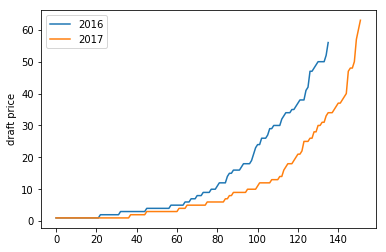

In [2]:
plt.plot(df_2016['price'], label='2016')
plt.plot(df_2017['price'], label='2017')
plt.ylabel('draft price')
plt.legend(loc='upper left')
plt.show()

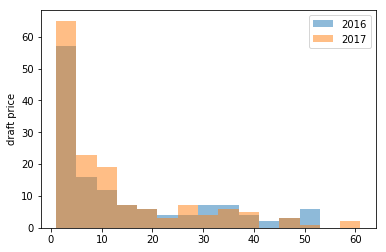

In [4]:
def createHistogram(df, label):
    plt.hist(df['price'], bins=range(df['price'].min(), df['price'].max(), 4), alpha=0.5, label=label)
    
createHistogram(df_2016, "2016")
createHistogram(df_2017, "2017")
plt.ylabel('draft price')
plt.legend(loc='upper right')
plt.show()